# Exercise 3

In [1]:
import pandas as pd
data = pd.read_csv("us-states.csv")

In [2]:
data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
51521,2022-09-18,Virginia,51,2070182,21679
51522,2022-09-18,Washington,53,1801179,14233
51523,2022-09-18,West Virginia,54,595044,7364
51524,2022-09-18,Wisconsin,55,1851892,15190


## Function 1

In [158]:
# FUNCTION: Takes a list of state names and plots their new cases vs date using overlaid line graphs, one for each selected state.
# INPUT & OUTPUT: Input "state_list" (a list of states from USA) & "case_period" (the last ... days to be tracked for new cases); Output none.
# REQUIRE: "state_list" is a list of valid states; case_period does not exceed the max date period
import matplotlib.pyplot as plt
def plot_cases_bystate(state_list, case_period=None):
    data = pd.read_csv("us-states.csv")
    plt.figure(figsize=(20,10))
    for state in state_list:
        if case_period is None:
            case_period = data[data['state'] == state].shape[0] - 1
        temp_df = data[data['state'] == state].tail(case_period+1) # Sort out the state and pick out the last case_period days
        new_cases = [temp_df['cases'].iloc[i+1] - temp_df['cases'].iloc[i] for i in range(temp_df.shape[0]-1)]
        plt.plot(temp_df['date'].iloc[1::], new_cases, label=state)
        plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('New cases',fontsize=15)
    plt.title('The nearest ' + str(case_period) + ' days of Covid new cases in chosen states: ' + ", ".join(state_list),fontsize=15)
    plt.show()

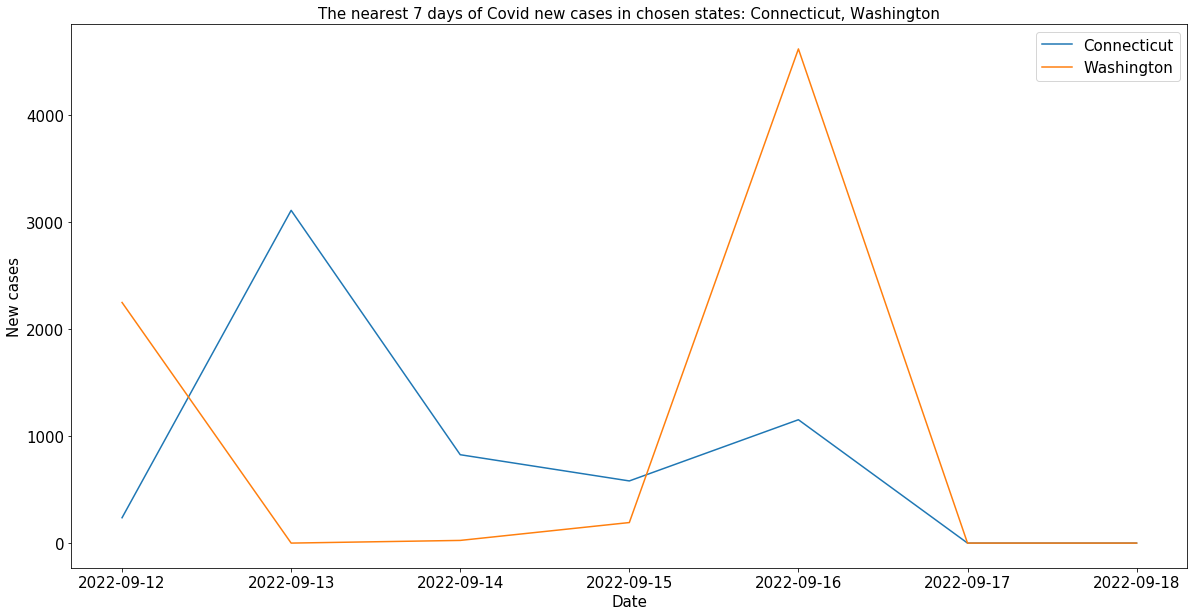

In [149]:
plot_cases_bystate(['Connecticut', 'Washington'], 7)

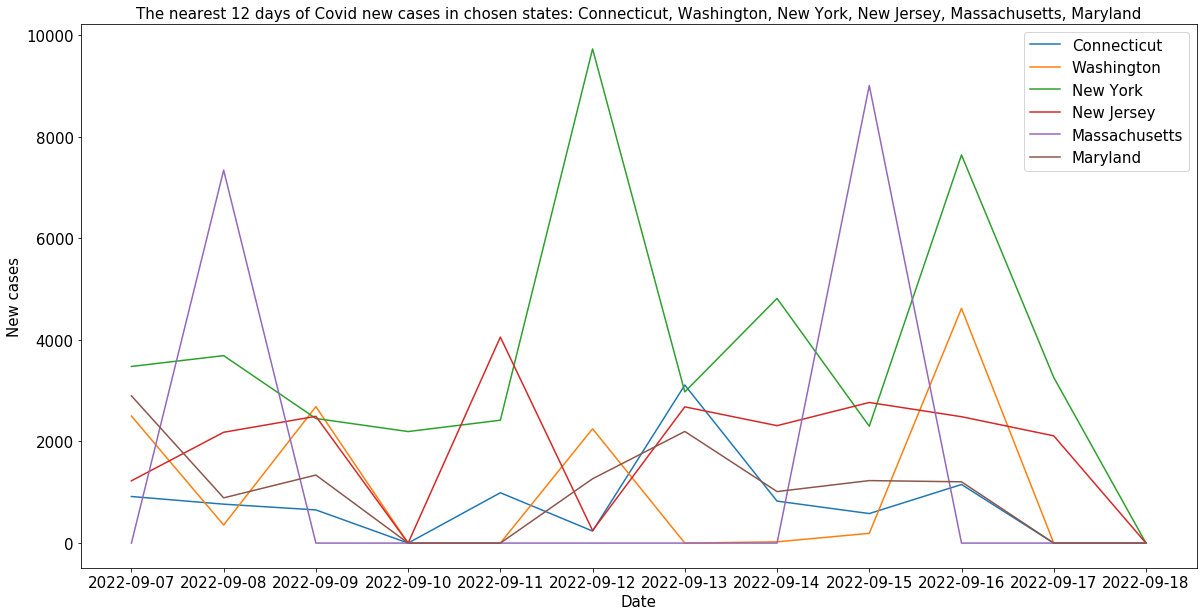

In [151]:
plot_cases_bystate(['Connecticut', 'Washington', 'New York', 'New Jersey', 'Massachusetts', 'Maryland'], 12)

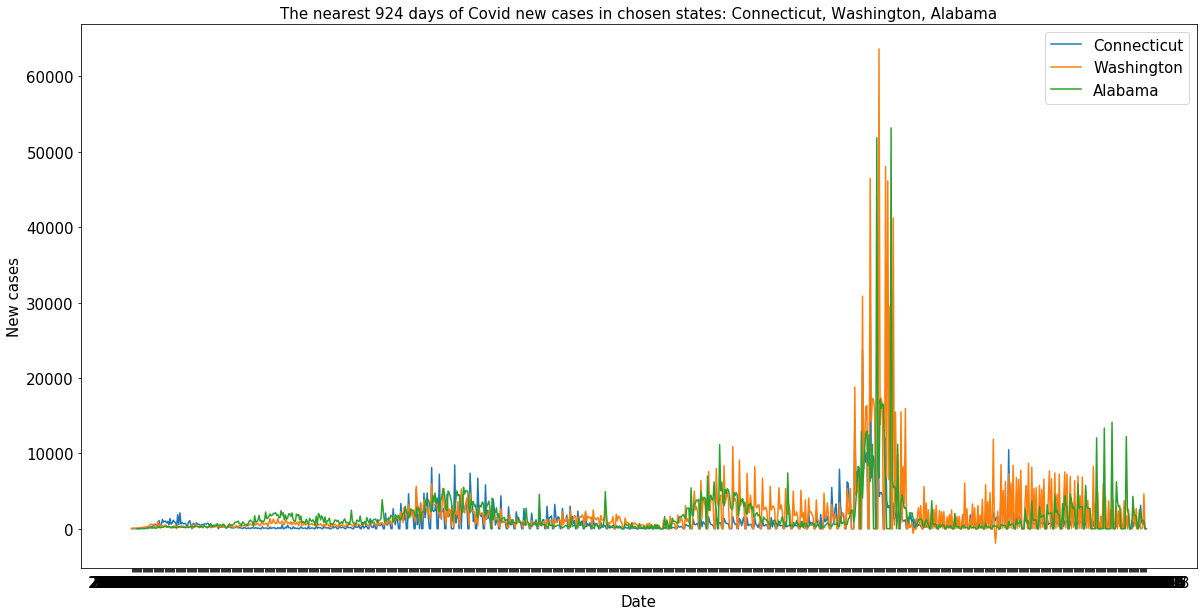

In [153]:
plot_cases_bystate(['Connecticut', 'Washington', 'Alabama'])

## Function 2

In [295]:
# FUNCTION: Takes the name of a state and returns the date of its highest number of new cases
def highest_case(state):
    data = pd.read_csv("us-states.csv")
    state_data = data[data['state'] == state].copy()
    state_data['new_cases'] = state_data['cases'].iloc[0]
    state_data = state_data.reset_index()
    for i in reversed(range(1,state_data.shape[0])):
        state_data.loc[i, 'new_cases'] = state_data['cases'].loc[i] - state_data['cases'].loc[i-1]
    return state_data.sort_values(by='new_cases',ascending=False)['date'].iloc[0]

In [315]:
print(highest_case('Connecticut'))
print(highest_case('Alabama'))
print(highest_case('New York'))
print(highest_case('New Jersey'))
print(highest_case('Maine'))

2022-01-10
2022-01-29
2022-01-08
2021-01-04
2022-02-15


## Function 3

In [361]:
# FUNCTION: Takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate that one's peak from the other one's peak.
from dateutil.parser import parse as parse_date
def statewise_comparison(state1, state2):
    peak_state1 = highest_case(state1)
    peak_state2 = highest_case(state2)
    date1 = parse_date(peak_state1)
    date2 = parse_date(peak_state2)
    if (date1 == date2):
        print(state1, 'and', state2, 'had the same peak of new cases, which is on', peak_state1)
    elif (date1 < date2):
        print(state1, "had its highest number of daily new cases first and is", (date2-date1).days, "days earlier than", state2)
    else: 
        print(state2, "had its highest number of daily new cases first and is", (date1-date2).days, "days earlier than", state1)

In [362]:
statewise_comparison('Connecticut', 'Massachusetts')
statewise_comparison('Connecticut', 'New York')
statewise_comparison('Alabama', 'Maine')

Connecticut and Massachusetts had the same peak of new cases, which is on 2022-01-10
New York had its highest number of daily new cases first and is 2 days earlier than Connecticut
Alabama had its highest number of daily new cases first and is 17 days earlier than Maine
